# Table of Content<a class="anchor" id="table-of-content"></a>
* [1. Problem Introduction and Motivation](#problem-introduction)
* [2. Problem Background](#problem-background)
* [3. Libraries and Custome Functions](#libraries)
* [4. Data Preparation and Modeling](#modeling)
* [5. STS1](#sts1)
* [6. ZQT2](#zqt2)
* [7. ZQT3](#zqt3)
* [8. ZQT4](#zqt4)
* [9. ZQT5](#zqt5)
* [10. ZQT6](#zqt6)
* [11. ZQT7](#zqt7)
* [12. ZQT8](#zqt8)
* [13. STSX](#stsx)
* [14. Geography](#geography)
* [15. Brand](#brand)
* [16. Seller](#seller)
* [17. Bid Support Specialist](#bss)
* [18. General Organizational Structure](#structure)
* [19. Seller Feedback](#seller-feedback)
* [20. BSS Feedback](#bss-feedback)
* [21. Bid Size](#bid-size)
* [22. Swim Lane Flowchart](#swim-lane)

# 1.Problem Introduction and Motivation<a class="anchor" id="problem-introduction"></a>
* [Go to Top](#table-of-content)

>**What is the problem we are facing?**<br>
>In the last two years Gentech has seen an 18% reduction in its revenue.<br><br>
>**Who are the stakeholders in this problem?**<br>
>1. Seller
>2. BSS(Bid Support Specialist)
>3. Pricing Team 
>4. Product Design Team
>5. Brand Manager
>6. Proposal Support Manager
>**What are the possible actions that could be taken as a result of this work?**<br>
>For the sellers, they can evaluate the prices they set and make changes to the prices. For the buyers, they can compare the real price with the predicted price and help them decide whether to buy the car or not. <br><br>
>**How do we define success?**<br>
>We are looking to the task force to drive efficiencies in operations worldwide and to reduce cycle time of operations by 15%.<br><br>
>**Important Executives:**<br>
>1. CEO(Chief Executive Officer) of the company: Elliot Smith
>2. VP(Vice President) of supply chain operations: Grace Monroe
>**Important Notes:**<br>
>1. Regardless of the magnitude of the proposal (complexity and  dollar value), the Bid Support Staff follow the same process.
>2. Jeff Hugh, LSS Black Belt, was tapped to re-engineer the proposal creation process by Grace Monroe. 

# 2. Problem Background<a class="anchor" id="problem-background"></a>
* [Go to Top](#table-of-content)
<br>


>- Gentech is a large multinational company with an annual revenue of 60 Billion.
>- Gentech sells software, hardware and integrated business solutions.
>- Jeff learns that the group has been following Agile practices and have organized themselves in squads of 4 bid specialist that support each of Gentech’s 5 brands/product lines. 
>- With 4 bid specialist in each squad, the total workforce in Manila is made up of 20 bid specialist.

# 3. Libraries and Custome Functions<a class="anchor" id="libraries"></a>
* [Go to Top](#table-of-content)

In [135]:
import pandas as pd
# pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with
# "relational" or "labeled" data both easy and intuituve.

pd.options.display.float_format = '{:.2f}'.format
# ask pandas to display float values to two decimal places.

import numpy as np
# numpy is a Python library used for working with arrays. Is also has functions for working in domain of linear 
# algebra, fourier transform, and matrices.

import math
# math module allows you to perform mathematical tasks on numbers.

import statsmodels.api as sm
# statsmodels is a Python package that allows users to explore data, estimate statistical models, and perform 
# statistical tests. API stands for application programming interface, an API acts as a communication layer, or as 
# an interface that allows different systems to talk to each other without having to understand exactly what each 
# other does.

import pickle
# pickle is a module that is used for serializing and de-reserializing a Python object structure.

import matplotlib.pyplot as plt
# matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.

import seaborn as sns
# seaborn is a data visualization library for statistical graphic plotting in Python, and it is based on matplotlib.

import plotly.graph_objects as go
# plotly.graph_objects is a module that contains an automatically generated hierarchy of Python classes which 
# represent non-leaf nodes in this figure schema.

from sklearn.linear_model import LogisticRegression
# sklearn.linear_model is a machine learning package. It offers a set of fast tools for machine learning and 
# statistical modeling, such as classification, regression, clustering, and dimenstionality reduction, and we want
# to import LogisticRegression tool from sklearn.linear_model.

from sklearn import metrics
# sklearn.metrics is a module that implements several loss, score, and utility functions to measure classification
# performance.

from sklearn.metrics import accuracy_score
# sklearn.metrics is a module that implements several loss, score, and utility functions to measure classification
# performance, the accuracy_score function calculates the accuracy score for a set of predicted labels against the 
# true labels.

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error
# sklearn.metrics is a module that implements several loss, score, and utility functions to measure classification
# performance, and we want to use the functions we import to calculate mean absolute percentage error(MAPE), mean 
# absolute error(MAE), R2 score, and mean squared error(MSE).

from sklearn.model_selection import train_test_split
# train_test_split function of the sklearn.model_selection package splits array or matrices into random subsets
# for train and test data.

from sklearn.linear_model import LinearRegression
# LinearRegression function contains different functions for performing machine learning with linear models.

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
# NearestNeighbors function helps us finding he nearest neighbors between two sets of data, KNeighborsClassifier
# implements the k-nearest neighbors vote.

from sklearn.metrics import confusion_matrix

In [136]:
# Create a function for getting statistical values, it use dictionary to get the value of the of different measurements of 
# the data.
def my_summary_stats(X,feature_list):
    temp = pd.DataFrame(dict(mean = X[feature_list].mean().round(2),
                             median = X[feature_list].median().round(2),
                             std_dev = X[feature_list].std().round(2),
                             min_val = X[feature_list].min().round(2),
                             max_val = X[feature_list].max().round(2),
                             outlier_issue = np.where(X[feature_list].std()/X[feature_list].mean() > 2,
                                                      True,False)
                            ))
    return temp

def my_summary_stats_float(X,feature_list):
    temp = pd.DataFrame(dict(mean = X[feature_list].mean(),
                             median = X[feature_list].median(),
                             std_dev = X[feature_list].std(),
                             min_val = X[feature_list].min(),
                             max_val = X[feature_list].max(),
                             outlier_issue = np.where(X[feature_list].std()/X[feature_list].mean() > 2,
                                                      True,False)
                            ))
    return temp
def target_by_cats(X):
    '''
    This function assumes the input dataframe (X) has a numerically defined target
    variable in the first column and that all remaining features are categorical
    '''
    global_mean = X.iloc[:,0].mean()
    target = X.columns[0]
    for col in X.columns[1:]:
        df_group = X.groupby(by=col)[target].agg(['mean']).round(2)
        df_group['diff'] = (df_group['mean'] - global_mean).round(2)
        display(df_group)

In [137]:
# Create a function for training and testing data
def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','Adj-R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create adj_R2
    adj_r2 = (1-(1-r2_score(y_train,y_hat))*(len(y_train)-1)/(len(y_train)-len(model.coef_)-1)).round(3)

    
    train_metrics = [r2, adj_r2,
                     mean_absolute_error(y_train,y_hat).round(3),
                     mean_absolute_percentage_error(y_train,y_hat).round(3)*100,
                     (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
                    ]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    (1-(1-r2_score(y_test,y_hat))*(len(y_test)-1)/(len(y_test)-len(model.coef_)-1)).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    print(all_metrics)

# 4.Data Preparation and Modeling<a class="anchor" id="modeling"></a>
* [Go to Top](#table-of-content)

In [138]:
#df.to_excel('output.xlsx', engine='xlsxwriter')
df = pd.read_excel('Sales_Transaction_Dataset_Final.xlsx',keep_default_na=False) # Prevent Jupyter see NA as NAN value
# df means data frame, the read_csv() function is used to retrieve data from from csv file, and this function is 
# in the pandas package so there is a pd. in front of the function.
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
df = df.rename(columns={'Bid_Size_($)': 'Bid_Size'})
df.info()
# Look at the information of the data frame.

#df.tail()
# Look at the last 5 records of the data frame.

df.head()
# Look at the first 5 records of the data frame.

#pd.set_option('display.max_rows', None)
# Setting the max row number we want to display, the default is 10 and if we set the value as None, it will display
# all the rows.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   #                 250000 non-null  int64  
 1   Geo               250000 non-null  object 
 2   Seller            250000 non-null  object 
 3   Brand             250000 non-null  object 
 4   BSS               250000 non-null  int64  
 5   STS1              250000 non-null  float64
 6   ZQT2              250000 non-null  float64
 7   ZQT3              250000 non-null  float64
 8   ZQT4              250000 non-null  float64
 9   ZQT5              250000 non-null  float64
 10  ZQT6              250000 non-null  float64
 11  ZQT7              250000 non-null  float64
 12  ZQT8              250000 non-null  float64
 13  STSX              250000 non-null  float64
 14  Seller_Feed_back  250000 non-null  object 
 15  BSS_Feedback      250000 non-null  object 
 16  Bid_Size          25

#   Geo Seller       Brand  BSS  STS1  ZQT2  ZQT3  ZQT4  ZQT5  ZQT6  ZQT7  \
0  1    AP  Wendy  Consulting   94  1.00  1.00  1.00  3.50  1.00  4.33  1.27   
1  2    SA    Amy     xSeries    5  1.00  3.25  3.79  1.00  1.64 12.12  1.00   
2  3   JPN   Aiko         SWG   52  3.26  2.86  1.00  1.00  1.00  8.81  3.62   
3  4   JPN   Yoko     xSeries   45  1.00  2.43  1.00  2.34  1.00  3.68  5.29   
4  5  EMEA  Pablo         ESW   38  3.26  3.94  1.00  1.00  5.16 11.56  3.08   

   ZQT8  STSX              Seller_Feed_back                 BSS_Feedback  \
0  4.07  1.00       Incomplete requirements    Error in address provided   
1  2.41  2.83  ERP system doesn't work well         Multiple submissions   
2  5.90  2.28       Proposal takes too long  Documentation provided late   
3  7.78  1.00                too much churn        Configuration changed   
4  8.26  5.82       Incorrect configuration     Missing Customer address   

   Bid_Size  
0     23370  
1     46222  
2     40270  
3     40811  
4     85523

>1. Total: 250000 rows
>2. Total: 17 columns
>3. The number in BSS column represent the BSS, each BSS will have a specific number, the number ranges from 1 to 100.
>4. 

<br><br>

| Feature           | Thoughts/Expectations(impact on )                                                          | 
|------------------	|--------------------------------------------------------------------------------------------|
| Geo:    	        | Geography               	                                                                 |
| Seller:      	    | Seller                  	                                                                 |
| Brand:      	    | Brand                  	                                                                 | 
| BSS:     	        | Bid Support Specialist                  	                                                 |
| STS1:      	    | Seller submit a request in the ERP system, the request is marked with a time stamp(STS1)   | 
| ZQT2:      	    | BSS access the request at time stamp(ZQT2)                 	                             | 
| ZQT3:      	    | Once the request is routed to the right agent, it has a time stamp(ZQT3)                 	 | 
| ZQT4:      	    | BSS reviews the request with his/her Proposal Support Manager(ZQT4)                  	     | 
| ZQT5:      	    | Request sent out to the Product Design Team(ZQT5)                 	                     | 
| ZQT6:      	    | The configuration is reviewed for completeness by the BSS(ZQT6)                	         | 
| ZQT7:      	    | Once the configuration has been approved(ZQT7)                 	                         | 
| ZQT8:      	    | The request is sent back to BSS(ZQT8)                  	                                 |
| STSX:      	    | Seller take the proposal to the client(STSX)                 	                             |
| Seller_Feed_back: | Feedback for the seller                  	                                                 |
| BSS_Feedback:     | Feedback for the BSS                 	                                                     |
| Bid_Size_($):     | Bid Size in dollars                 	                                                     |

In [139]:
df.describe().T

count      mean      std      min      25%       50%       75%  \
#        250000.00 125000.50 72168.93     1.00 62500.75 125000.50 187500.25   
BSS      250000.00     50.42    29.56     1.00    24.00     50.00     76.00   
STS1     250000.00      1.89     1.27     1.00     1.00      1.12      2.51   
ZQT2     250000.00      2.01     1.40     1.00     1.00      1.25      2.71   
ZQT3     250000.00      3.07     2.79     1.00     1.00      1.76      4.16   
ZQT4     250000.00      3.57     3.56     1.00     1.00      1.79      4.77   
ZQT5     250000.00      1.98     1.36     1.00     1.00      1.23      2.66   
ZQT6     250000.00      7.61     2.54     1.00     5.86      7.59      9.36   
ZQT7     250000.00      3.14     2.95     1.00     1.00      1.76      4.17   
ZQT8     250000.00      6.57     2.37     1.00     4.94      6.54      8.16   
STSX     250000.00      2.00     1.37     1.00     1.00      1.26      2.69   
Bid_Size 250000.00  62258.97 50019.86 15000.00 33986.00  44631.00  69665.00   

                max  
#         250000.00  
BSS          100.00  
STS1          11.05  
ZQT2          12.92  
ZQT3          17.23  
ZQT4          19.31  
ZQT5          11.81  
ZQT6          18.33  
ZQT7          17.11  
ZQT8          18.52  
STSX          11.52  
Bid_Size 1226111.00

In [140]:
# Create a dataframe that only contains numerical variables and use the funtion 'my_summary_stats' to gain an insight
# of the statistical value of the variables.
numerical_vars = ['BSS', 'STS1', 'ZQT2', 'ZQT3', 'ZQT4', 'ZQT5', 'ZQT6', 'ZQT7', 'ZQT8', 'STSX', 'Bid_Size']
my_summary_stats(df,numerical_vars)

mean   median  std_dev  min_val    max_val  outlier_issue
BSS         50.42    50.00    29.56     1.00     100.00          False
STS1         1.89     1.12     1.27     1.00      11.05          False
ZQT2         2.01     1.25     1.40     1.00      12.92          False
ZQT3         3.07     1.76     2.79     1.00      17.23          False
ZQT4         3.57     1.79     3.56     1.00      19.31          False
ZQT5         1.98     1.23     1.36     1.00      11.81          False
ZQT6         7.61     7.59     2.54     1.00      18.33          False
ZQT7         3.14     1.76     2.95     1.00      17.11          False
ZQT8         6.57     6.54     2.37     1.00      18.52          False
STSX         2.00     1.26     1.37     1.00      11.52          False
Bid_Size 62258.97 44631.00 50019.86 15000.00 1226111.00          False

>**The ranking of timestamp based on the mean:**<br>
>1. ZQT6: 7.61
>2. ZQT8: 6.57
>3. ZQT4: 3.57
>4. ZQT7: 3.14
>5. ZQT3: 3.07
>6. ZQT2: 2.01
>7. STSX: 2.00
>8. ZQT5: 1.98
>9. STS1: 1.89

>**The ranking of timestamp based on the median:**<br>
>1. ZQT6: 7.59
>2. ZQT8: 6.54
>3. ZQT4: 1.79
>4. ZQT3 & ZQT7: 1.76
>5. STSX: 1.26
>6. ZQT2: 1.25
>7. ZQT5: 1.23
>8. STS1: 1.12

In [141]:
df['Total_Transaction_Time'] = df['STS1'] + df['ZQT2'] + df['ZQT3'] + df['ZQT4'] + df['ZQT5'] + df['ZQT6'] + df['ZQT7']+ df['ZQT8'] + df['STSX']

In [142]:
pd.set_option('display.max_rows', None)
df['Total_Transaction_Time']

0        18.17
1        29.04
2        29.73
3        25.53
4        43.08
5        29.64
6        28.27
7        50.16
8        17.33
9        48.69
10       16.84
11       31.11
12       31.32
13       33.60
14       29.33
15       26.57
16       47.13
17       31.28
18       48.35
19       45.29
20       41.67
21       25.68
22       24.00
23       21.70
24       31.19
25       32.49
26       24.79
27       36.55
28       48.61
29       26.93
30       27.24
31       40.11
32       33.58
33       51.50
34       22.64
35       47.78
36       21.66
37       20.27
38       31.17
39       48.43
40       17.28
41       27.04
42       27.97
43       26.99
44       30.22
45       27.39
46       47.46
47       44.64
48       30.30
49       38.68
50       21.59
51       26.20
52       29.37
53       27.77
54       55.05
55       32.81
56       30.91
57       34.75
58       34.17
59       16.23
60       30.62
61       19.97
62       40.87
63       55.91
64       48.70
65       45.52
66       2

In [143]:
len(df[df['Total_Transaction_Time'] >= 55])

5418

>- **5418 defects in 250000 opportunities**<br>
>- **dpmo = (5418/250000) * 1000000 = 21672**

In [144]:
total = ['Total_Transaction_Time']
my_summary_stats_float(df, total)

mean  median  std_dev  min_val  max_val  outlier_issue
Total_Transaction_Time 31.86   29.04     9.74     9.78    80.57          False

In [145]:
(df[df['Total_Transaction_Time'] >= 55]).mean()

/var/folders/qn/b83j31g56rg2d51wzvlbt_n00000gn/T/ipykernel_22368/2994065458.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (df[df['Total_Transaction_Time'] >= 55]).mean()


#                        124953.40
BSS                          64.97
STS1                          2.69
ZQT2                          2.95
ZQT3                          9.13
ZQT4                         11.09
ZQT5                          2.89
ZQT6                          9.32
ZQT7                          9.43
ZQT8                          8.21
STSX                          2.77
Bid_Size                 226220.29
Total_Transaction_Time       58.47
dtype: float64

In [269]:
df1 = pd.DataFrame({'count': [2.69, 2.95, 9.13, 11.09, 2.89, 9.32, 9.43, 8.21, 2.77]})
df1.index = ['STS1', 'ZQT2', 'ZQT3', 'ZQT4', 'ZQT5', 'ZQT6', 'ZQT7', 'ZQT8', 'STSX']
df1 = df1.sort_values(by='count', ascending=False)
df1['cumperc'] = df1['count'].cumsum()/df1['count'].sum()*100
df1

count  cumperc
ZQT4  11.09    18.96
ZQT7   9.43    35.09
ZQT6   9.32    51.03
ZQT3   9.13    66.64
ZQT8   8.21    80.68
ZQT2   2.95    85.72
ZQT5   2.89    90.66
STSX   2.77    95.40
STS1   2.69   100.00

ValueError: x and y must have same first dimension, but have shapes (250000,) and (9,)

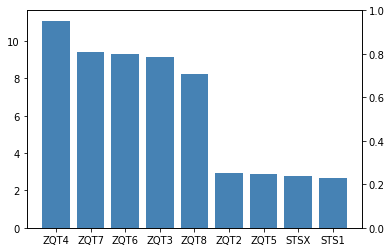

In [272]:
from matplotlib.ticker import PercentFormatter

# Define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

# Create basic bar plot
fig, ax = plt.subplots()
ax.bar(df1.index, df1['count'], color=color1)

#Add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df.index, df1['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# Specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

# Display Pareto Chart
plt.show()

In [146]:
(df[df['Total_Transaction_Time'] < 55]).mean()

/var/folders/qn/b83j31g56rg2d51wzvlbt_n00000gn/T/ipykernel_22368/829660148.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (df[df['Total_Transaction_Time'] < 55]).mean()


#                        125001.54
BSS                          50.10
STS1                          1.87
ZQT2                          1.99
ZQT3                          2.94
ZQT4                          3.41
ZQT5                          1.96
ZQT6                          7.58
ZQT7                          3.00
ZQT8                          6.53
STSX                          1.98
Bid_Size                  58626.88
Total_Transaction_Time       31.27
dtype: float64

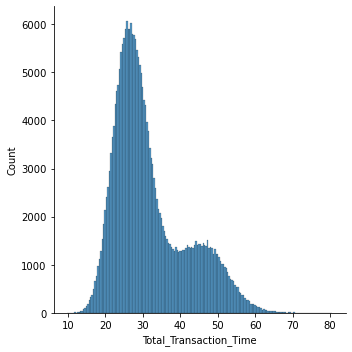

In [147]:
sns.displot(df['Total_Transaction_Time'])

In [148]:
# Create temp dataframe with target and categorical variables only
categorical = ['object']
X = pd.merge(df['Total_Transaction_Time'],df.select_dtypes(include=categorical),left_index=True,right_index=True)

# Compute average target values for all categorical alternatives
target_by_cats(X)

mean  diff
Geo             
AP   30.51 -1.35
EMEA 31.06 -0.80
JPN  27.03 -4.83
NA   36.15  4.29
SA   31.27 -0.59

mean  diff
Seller               
Aiko      27.02 -4.84
Alina     28.28 -3.58
Alison    27.23 -4.63
Amy       28.19 -3.67
Caitlin   26.31 -5.55
Carlos    28.09 -3.77
Devin     46.87 15.01
Hali      27.26 -4.60
Henry     28.33 -3.53
Jose      43.68 11.82
Martha    28.16 -3.70
Matsuyama 27.09 -4.77
Omar      28.16 -3.70
Ozil      41.99 10.13
Pablo     28.43 -3.43
Pierre    28.36 -3.50
Roger     26.32 -5.54
Sakura    27.06 -4.80
Sam       47.80 15.94
Tamara    27.16 -4.70
Thomas    26.33 -5.53
Wendy     26.23 -5.63
William   50.74 18.88
Yoko      26.91 -4.95
Yui       27.05 -4.81

mean  diff
Brand                 
Consulting 31.28 -0.58
ESW        32.18  0.32
SWG        31.60 -0.26
xSeries    31.91  0.05
zSeries    32.33  0.47

mean  diff
Seller_Feed_back                           
BSS inexperienced               31.93  0.07
BSS lacks domain knowledge      31.80 -0.06
Difficult to identify BSS agent 31.80 -0.06
ERP system doesn't work well    31.87  0.01
Errors in configuration         31.89  0.03
Incomplete requirements         31.90  0.04
Incorrect configuration         31.96  0.10
Proposal takes too long         31.90  0.04
Responses rate is too slow      31.79 -0.07
Submission process is tedious   31.77 -0.09
Terms and conditions had errors 31.83 -0.03
Too many errors by BSS          31.80 -0.06
pricing is not competitive      31.92  0.06
too much churn                  31.82 -0.04

mean  diff
BSS_Feedback                               
Bid manager on vacation         31.87  0.01
Brand approval takes too long   31.99  0.13
Configuration changed           31.87  0.01
Documentation provided late     31.77 -0.09
Error in address provided       31.82 -0.04
Incomplete information          31.69 -0.17
Missing Customer address        31.95  0.09
Missing configuration details   31.80 -0.06
Missing seller information      31.94  0.08
Multiple quote submissions      31.85 -0.01
Multiple submissions            31.83 -0.03
Pricing approval takes too long 31.96  0.10
System outage                   31.78 -0.08
customer not in database        31.95  0.09

# 5.STS1<a class="anchor" id="sts1"></a>
* [Go to Top](#table-of-content)

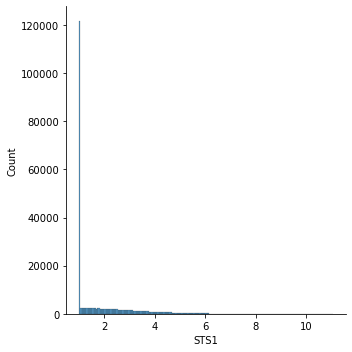

In [149]:
sns.displot(df['STS1'])

# 6.ZQT2<a class="anchor" id="zqt2"></a>
* [Go to Top](#table-of-content)

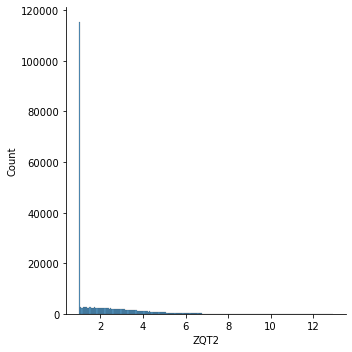

In [150]:
sns.displot(df['ZQT2'])

# 7.ZQT3<a class="anchor" id="zqt3"></a>
* [Go to Top](#table-of-content)

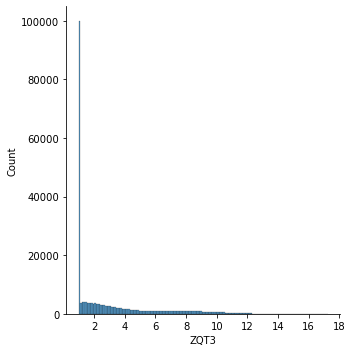

In [151]:
sns.displot(df['ZQT3'])

# 8.ZQT4<a class="anchor" id="zqt4"></a>
* [Go to Top](#table-of-content)

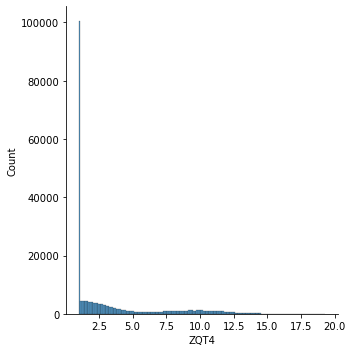

In [152]:
sns.displot(df['ZQT4'])

# 9.ZQT5<a class="anchor" id="zqt5"></a>
* [Go to Top](#table-of-content)

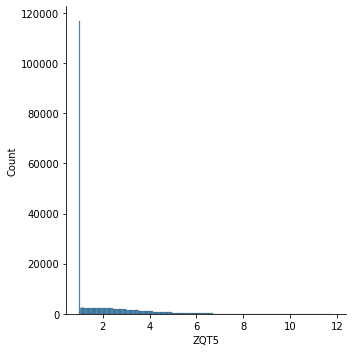

In [153]:
sns.displot(df['ZQT5'])

# 10.ZQT6<a class="anchor" id="zqt6"></a>
* [Go to Top](#table-of-content)

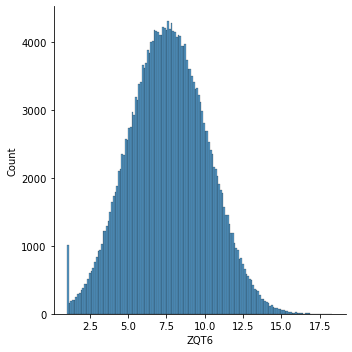

In [154]:
sns.displot(df['ZQT6'])

# 11.ZQT7<a class="anchor" id="zqt7"></a>
* [Go to Top](#table-of-content)

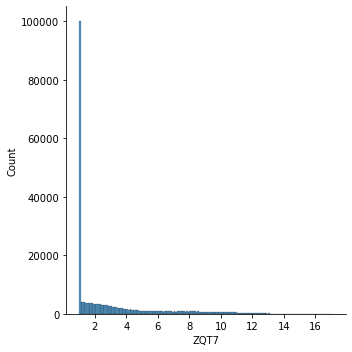

In [155]:
sns.displot(df['ZQT7'])

# 12.ZQT8<a class="anchor" id="zqt8"></a>
* [Go to Top](#table-of-content)

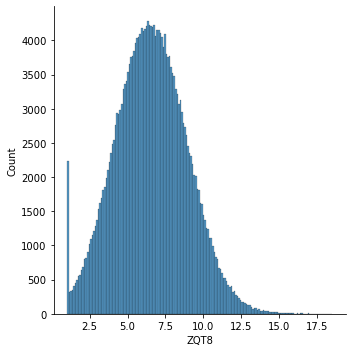

In [156]:
sns.displot(df['ZQT8'])

# 13.STSX<a class="anchor" id="stsx"></a>
* [Go to Top](#table-of-content)

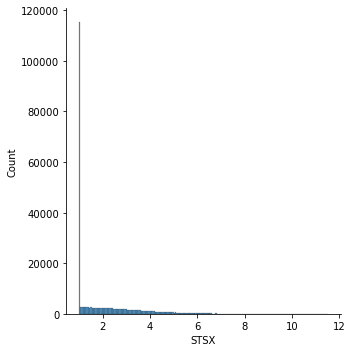

In [157]:
sns.displot(df['STSX'])

# 14.Geography<a class="anchor" id="geography"></a>
* [Go to Top](#table-of-content)

In [158]:
df['Geo'].nunique()

5

>**There are 5 unique values for Geography:**<br>
>1. SA(South America)
>2. EMEA(Europe, Middle East, Afica)
>3. JPN(Japan)
>4. NA(North America)
>5. AP(Asia Pacific)

In [159]:
df['Geo'].value_counts().reindex(['SA', 'EMEA', 'JPN', 'NA', 'AP'], fill_value = 0)

SA      50473
EMEA    62233
JPN     25062
NA      62344
AP      49888
Name: Geo, dtype: int64

<BarContainer object of 5 artists>

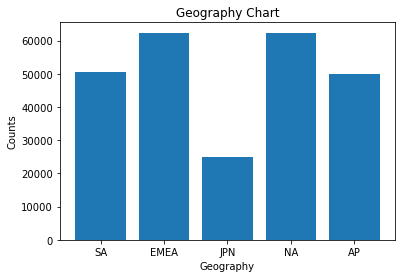

In [160]:
geo = ({'SA':50473, 'EMEA':62233, 'JPN':25062, 'NA':62344, 'AP':49888})
plt.title("Geography Chart")
plt.xlabel("Geography")
plt.ylabel("Counts")
plt.bar(geo.keys(), geo.values())

In [273]:
df.loc[df['Geo'] == 'SA', 'Total_Transaction_Time'].mean()

31.273405181507606

In [274]:
df.loc[df['Geo'] == 'EMEA', 'Total_Transaction_Time'].mean()

31.06201145972476

In [275]:
df.loc[df['Geo'] == 'JPN', 'Total_Transaction_Time'].mean()

27.025102038688424

In [276]:
df.loc[df['Geo'] == 'NA', 'Total_Transaction_Time'].mean()

36.15257800391885

In [277]:
df.loc[df['Geo'] == 'AP', 'Total_Transaction_Time'].mean()

30.50626580079017

>1. NA: 36.15257800391885
>2. SA: 31.273405181507606
>3. EMEA: 31.06201145972476
>4. AP: 30.50626580079017
>5. JPN: 27.025102038688424

# 15.Brand<a class="anchor" id="brand"></a>
* [Go to Top](#table-of-content)

In [161]:
df['Brand'].nunique()

5

>**There are 5 unique values for Brand:**<br>
>1. zSeries
>2. xSeries
>3. SWG
>4. Consulting
>5. ESW

In [162]:
df['Brand'].value_counts().reindex(['zSeries', 'xSeries', 'SWG', 'Consulting', 'ESW'], fill_value = 0)

zSeries       50083
xSeries       49971
SWG           50388
Consulting    49866
ESW           49692
Name: Brand, dtype: int64

<BarContainer object of 5 artists>

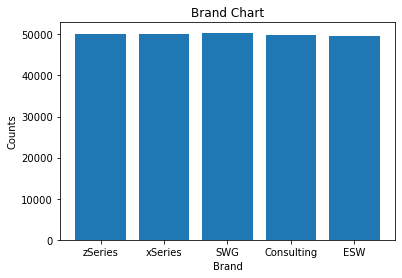

In [163]:
brand = ({'zSeries':50083, 'xSeries':49971, 'SWG':50388, 'Consulting':49866, 'ESW':49692})
plt.title("Brand Chart")
plt.xlabel("Brand")
plt.ylabel("Counts")
plt.bar(brand.keys(), brand.values())

In [281]:
df.loc[df['Brand'] == 'zSeries', 'Total_Transaction_Time'].mean()

32.327800823423715

In [282]:
df.loc[df['Brand'] == 'xSeries', 'Total_Transaction_Time'].mean()

31.907434207308462

In [284]:
df.loc[df['Brand'] == 'SWG', 'Total_Transaction_Time'].mean()

31.603934431001434

In [286]:
df.loc[df['Brand'] == 'Consulting', 'Total_Transaction_Time'].mean()

31.27955970104315

In [287]:
df.loc[df['Brand'] == 'ESW', 'Total_Transaction_Time'].mean()

32.175713232805464

# 16.Seller<a class="anchor" id="seller"></a>
* [Go to Top](#table-of-content)

In [164]:
df['Seller'].nunique()

25

>**There are 25 unique values for Seller, 5 for each geograhy:**<br>
>1. SA(South America):
>- Jose
>- Martha
>- Carlos
>- Omar
>- Amy
>2. EMEA(Europe, Middle East, Africa):
>- Pierre
>- Henry
>- Ozil
>- Pablo
>- Alina
>3. JPN(Japan):
>- Yoko
>- Matsuyama
>- Sakura
>- Yui
>- Aiko
>4. NA(North America):
>- Hali
>- Sam
>- William
>- Alison
>- Tamara
>5. AP(Asia Pacific):
>- Wendy
>- Roger
>- Devin
>- Caitlin
>- Thomas

In [165]:
df['Seller'].value_counts().reindex(['Jose', 'Martha', 'Carlos', 'Omar', 'Amy'], fill_value = 0)

Jose      10155
Martha     9990
Carlos    10117
Omar      10207
Amy       10004
Name: Seller, dtype: int64

>**The ranking of bid number in SA(South America):**<br>
>1. Omar: 10207
>2. Jose: 10155
>3. Carlos: 10117
>4. Amy: 10004
>5. Martha: 9990

In [166]:
df['Seller'].value_counts().reindex(['Pierre', 'Henry', 'Ozil', 'Pablo', 'Alina'], fill_value = 0)

Pierre    12465
Henry     12473
Ozil      12374
Pablo     12364
Alina     12557
Name: Seller, dtype: int64

>**The ranking of bid number in EMEA(Europe, Middle East, Africa):**<br>
>1. Alina: 12557
>2. Henry: 12473
>3. Pierre: 12465
>4. Ozil: 12374
>5. Pablo: 12364

In [167]:
df['Seller'].value_counts().reindex(['Yoko', 'Matsuyama', 'Sakura', 'Yui', 'Aiko'], fill_value = 0)

Yoko         5085
Matsuyama    5003
Sakura       4954
Yui          5025
Aiko         4995
Name: Seller, dtype: int64

>**The ranking of bid number in JPN(Japan):**<br>
>1. Yoko: 5085
>2. Yui: 5025
>3. Matsuyama: 5003
>4. Aiko: 4995
>5. Sakura: 4954

In [168]:
df['Seller'].value_counts().reindex(['Hali', 'Sam', 'William', 'Alison', 'Tamara'], fill_value = 0)

Hali       12270
Sam        12565
William    12689
Alison     12589
Tamara     12231
Name: Seller, dtype: int64

>**The ranking of bid number in NA(North America):**<br>
>1. William: 12689
>2. Alison: 12589
>3. Sam: 12565
>4. Hali: 12270
>5. Tamara: 12231

In [169]:
df['Seller'].value_counts().reindex(['Wendy', 'Roger', 'Devin', 'Caitlin', 'Thomas'], fill_value = 0)

Wendy      10039
Roger       9897
Devin      10205
Caitlin     9781
Thomas      9966
Name: Seller, dtype: int64

>**The ranking of bid number in AP(Asia Pacific):**<br>
>1. Devin: 10205
>2. Wendy: 10039
>3. Thomas: 9966
>4. Roger: 9897
>5. Caitlin: 9781

# 17.BSS(Bid Support Specialist)<a class="anchor" id="bss"></a>
* [Go to Top](#table-of-content)

>- There are 4 BSS dedicated to each brand<br>
>- Total BSS for each Geography: 4 * 5 = 20<br>
>- Total BSS in the organization: 20 * 5 = 100

In [170]:
#df['BSS'].unique()
#print(df['BSS'].value_counts()[31])
df['BSS'].value_counts()

31     4382
39     4372
66     3757
3      3606
30     3215
70     3212
69     3187
36     3165
37     3157
23     3156
22     3152
67     3146
72     3142
35     3138
76     3135
63     3132
75     3131
73     3129
62     3129
77     3125
27     3118
21     3115
25     3112
61     3108
79     3102
78     3101
11     3101
26     3091
74     3087
33     3077
40     3073
34     3068
64     3066
68     3052
71     3036
13     3036
18     3031
24     3019
80     3016
28     2971
15     2938
12     2934
7      2583
32     2573
6      2569
65     2551
97     2549
16     2546
8      2543
89     2537
5      2529
82     2526
81     2526
19     2526
83     2516
90     2515
92     2514
93     2513
85     2510
86     2499
84     2496
88     2492
94     2491
99     2485
9      2476
95     2475
98     2466
96     2464
20     2463
91     2460
100    2460
29     2458
2      2424
87     2394
4      2055
17     2024
1      2004
38     1821
59     1652
10     1587
14     1498
52     1339
42     1287
48  

# 18.General Organizational Structure<a class="anchor" id="structure"></a>
* [Go to Top](#table-of-content)


| Geography                           | Brand                                          | Seller                   |
|-------------------------------------|------------------------------------------------|---------------------------
| South America<br>(SA)	              | zSeries<br>xSeries<br>SWG<br>Consulting<br>ESW |Jose<br>Martha<br>Carlos<br>Omar<br>Amy<br>|
| EMEA(Europe,<br>Middle East, Africa | zSeries<br>xSeries<br>SWG<br>Consulting<br>ESW |Pierre<br>Henry<br>Ozil<br>Pablo<br>Alina<br>|
| Japan(JPN)                          | zSeries<br>xSeries<br>SWG<br>Consulting<br>ESW |Yoko<br>Matsuyama<br>Sakura<br>Yui<br>Aiko<br>|
| North America(NA)                   | zSeries<br>xSeries<br>SWG<br>Consulting<br>ESW |Hali<br>Sam<br>William<br>Alison<br>Tamara<br>|
| Asia Pacific(AP)                    | zSeries<br>xSeries<br>SWG<br>Consulting<br>ESW |Wendy<br>Roger<br>Devin<br>Caitlin<br>Thomas<br>|

# 19.Seller Feedback<a class="anchor" id="seller-feedback"></a>
* [Go to Top](#table-of-content)

In [171]:
df['Seller_Feed_back'].nunique()

14

>**There are 14 unique values for Seller Feedback:**<br>
>1. BSS inexperienced
>2. BSS lacks domain knowledge
>3. Difficult to identify BSS agent
>4. ERP system doesn't work well
>5. Errors in configuration
>6. Incomplete requirements
>7. Incorrect configuration
>8. Proposal takes too long
>9. Responses rate is too slow
>10. Submission process is tedious
>11. Terms and conditions had errors
>12. Too many errors by BSS
>13. pricing is not competitive
>14. too much churn
<br>
>**All the feedbacks are negative.**<br>

In [172]:
df['Seller_Feed_back'].value_counts().reindex(['BSS inexperienced', 'BSS lacks domain knowledge', 'Difficult to identify BSS agent', "ERP system doesn't work well", 'Errors in configuration',
'Incomplete requirements', 'Incorrect configuration',  'Proposal takes too long', 'Responses rate is too slow','Submission process is tedious','Terms and conditions had errors', 'Too many errors by BSS',  'pricing is not competitive', 'too much churn'], fill_value = 0).nlargest(14)

Difficult to identify BSS agent    37471
BSS lacks domain knowledge         25119
Proposal takes too long            25013
Incorrect configuration            24989
BSS inexperienced                  24852
Submission process is tedious      12637
ERP system doesn't work well       12587
too much churn                     12550
Incomplete requirements            12542
Too many errors by BSS             12503
Responses rate is too slow         12492
Errors in configuration            12466
pricing is not competitive         12459
Terms and conditions had errors    12320
Name: Seller_Feed_back, dtype: int64

<BarContainer object of 14 artists>

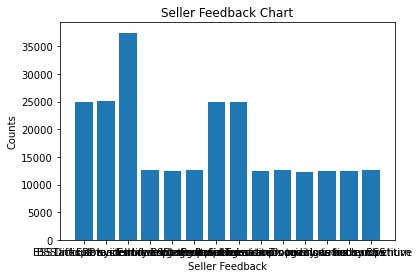

In [173]:
sellerfeedback = ({'BSS inexperienced':24852, 'BSS lacks domain knowledge': 25119, 'Difficult to identify BSS agent': 37471, "ERP system doesn't work well":12587, 'Errors in configuration':12466,
'Incomplete requirements':12542, 'Incorrect configuration':24989, 'Proposal takes too long':25013, 'Responses rate is too slow':12492,'Submission process is tedious':12637,'Terms and conditions had errors':12320, 'Too many errors by BSS':12503,  'pricing is not competitive':12459, 'too much churn':12550})
plt.title("Seller Feedback Chart")
plt.xlabel("Seller Feedback")
plt.ylabel("Counts")
plt.bar(sellerfeedback.keys(), sellerfeedback.values())

>**Seller Feedbacks that seems to appear more frequently:**<br>
>1. Difficult to identify BSS agent: 37471
>2. BSS lacks domain knowledge: 25119
>3. Proposal takes too long: 25013
>4. Incorrect configuration: 24989
>5. BSS inexperienced: 24852

In [174]:
df[df.Seller_Feed_back == 'Difficult to identify BSS agent'].groupby('Seller').Seller_Feed_back.count().nlargest(10).reset_index()

Seller  Seller_Feed_back
0   Alison              1919
1      Sam              1902
2    Alina              1894
3   Pierre              1879
4     Ozil              1864
5    Pablo              1861
6    Henry              1858
7   Tamara              1851
8  William              1832
9     Hali              1743

In [175]:
df[df.Seller_Feed_back == 'BSS lacks domain knowledge'].groupby('Seller').Seller_Feed_back.count().nlargest(10).reset_index()

Seller  Seller_Feed_back
0   Alison              1310
1  William              1307
2    Alina              1272
3     Ozil              1255
4   Pierre              1253
5   Tamara              1253
6    Henry              1248
7     Hali              1245
8    Pablo              1219
9      Sam              1218

In [176]:
df[df.Seller_Feed_back == 'Proposal takes too long'].groupby('Seller').Seller_Feed_back.count().nlargest(10).reset_index()

Seller  Seller_Feed_back
0    Henry              1296
1      Sam              1271
2   Alison              1251
3     Hali              1249
4    Pablo              1242
5  William              1240
6   Pierre              1237
7    Alina              1235
8     Ozil              1198
9   Tamara              1194

In [177]:
df[df.Seller_Feed_back == 'Incorrect configuration'].groupby('Seller').Seller_Feed_back.count().nlargest(10).reset_index()

Seller  Seller_Feed_back
0     Ozil              1309
1    Alina              1278
2  William              1251
3    Pablo              1246
4   Alison              1245
5      Sam              1245
6   Pierre              1241
7    Henry              1204
8     Hali              1199
9   Tamara              1188

In [178]:
df[df.Seller_Feed_back == 'BSS inexperienced'].groupby('Seller').Seller_Feed_back.count().nlargest(10).reset_index()

Seller  Seller_Feed_back
0  William              1302
1      Sam              1296
2   Pierre              1275
3    Henry              1271
4   Alison              1263
5    Alina              1238
6     Hali              1237
7   Tamara              1214
8     Ozil              1183
9    Pablo              1178

# 20.BSS Feedback<a class="anchor" id="bss-feedback"></a>
* [Go to Top](#table-of-content)

In [179]:
df['BSS_Feedback'].nunique()

14

In [180]:
df['BSS_Feedback'].value_counts().reindex(['Bid manager on vacation', 'Brand approval takes too long', 'Configuration changed', 'Documentation provided late', 'Error in address provided',
'Incomplete information', 'Missing Customer address',  'Missing configuration details', 'Missing seller information','Multiple quote submissions','Multiple submissions', 'Pricing approval takes too long',  'System outage', 'customer not in database'], fill_value = 0).nlargest(14)

Incomplete information             25119
Brand approval takes too long      25101
Error in address provided          25037
Missing Customer address           25007
Missing configuration details      24992
Missing seller information         24838
Documentation provided late        24729
Configuration changed              12746
Pricing approval takes too long    12500
Multiple quote submissions         12482
Multiple submissions               12457
Bid manager on vacation            12433
customer not in database            7485
System outage                       5074
Name: BSS_Feedback, dtype: int64

>**There are 14 unique values for BSS Feedback:**<br>
>1. Bid Manager on vacation
>2. Brand approval takes too long
>3. Configuration changed
>4. Documentation provided late
>5. Error in address provided
>6. Incomplete information
>7. Missing Customer address
>8. Missing configuration details
>9. Missing seller information
>10. Multiple quote submissions
>11. Multiple submissions
>12. Pricing approval takes too long
>13. System outage
>14. customer not in database
<br>
>**All the feedbacks are negative.**<br>

<BarContainer object of 14 artists>

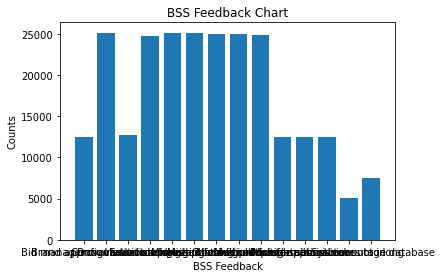

In [181]:
#bssfeedback = ({'SA':50473, 'EMEA':62233, 'JPN':25062, 'NA':62344, 'AP':49888})
bssfeedback = ({'Bid manager on vacation':12433, 'Brand approval takes too long': 25101, 'Configuration changed': 12746, 'Documentation provided late':24729, 'Error in address provided':25037,
'Incomplete information':25119, 'Missing Customer address':25007, 'Missing configuration details':24992, 'Missing seller information':24838,'Multiple quote submissions':12482,'Multiple submissions':12457, 'Pricing approval takes too long':12500,  'System outage':5074, 'customer not in database':7485})
plt.title("BSS Feedback Chart")
plt.xlabel("BSS Feedback")
plt.ylabel("Counts")
plt.bar(bssfeedback.keys(), bssfeedback.values())

>**BSS Feedbacks that seems to appear more frequently:**<br>
>1. Incomplete information: 25119
>2. Brand approval takes too long: 25101
>3. Missing Customer address: 25007
>4. Missing configuration details: 24992
>5. Missing seller information: 24838
>6. Documentation provided late: 24729

In [182]:
df[df.BSS_Feedback == 'Incomplete information'].groupby('BSS').BSS_Feedback.count().nlargest(10).reset_index()

BSS  BSS_Feedback
0   31           470
1   39           436
2   66           403
3    3           360
4   62           345
5   25           343
6   40           342
7   36           338
8   30           334
9   13           333

In [183]:
df[df.BSS_Feedback == 'Brand approval takes too long'].groupby('BSS').BSS_Feedback.count().nlargest(10).reset_index()

BSS  BSS_Feedback
0   31           427
1   39           419
2    3           394
3   66           363
4   36           340
5   78           336
6   11           330
7   69           330
8   72           330
9   37           329

KeyError: 'BSS'

In [184]:
df[df.BSS_Feedback == 'Missing Customer address'].groupby('BSS').BSS_Feedback.count().nlargest(10).reset_index()

BSS  BSS_Feedback
0   39           448
1   31           414
2   66           387
3    3           371
4   22           345
5   73           344
6   75           343
7   21           337
8   34           334
9   70           330

In [185]:
df[df.BSS_Feedback == 'Missing configuration details'].groupby('BSS').BSS_Feedback.count().nlargest(10).reset_index()

BSS  BSS_Feedback
0   31           465
1   39           438
2   66           367
3   11           349
4   61           345
5   63           340
6   77           338
7    3           335
8   69           327
9   72           327

In [186]:
df[df.BSS_Feedback == 'Missing seller information'].groupby('BSS').BSS_Feedback.count().nlargest(10).reset_index()

BSS  BSS_Feedback
0   39           459
1   31           412
2   66           408
3   70           350
4    3           345
5   30           339
6   76           334
7   26           333
8   78           331
9   37           329

In [187]:
df[df.BSS_Feedback == 'Documentation provided late'].groupby('BSS').BSS_Feedback.count().nlargest(10).reset_index()

BSS  BSS_Feedback
0   39           480
1   31           470
2    3           367
3   66           338
4   22           333
5   75           333
6   35           330
7   23           329
8   25           329
9   28           325

# 21.Bid Size<a class="anchor" id="bid-size"></a>
* [Go to Top](#table-of-content)

In [188]:
#df1 = df.groupby(["AP"]).Bid_Size.sum()
#df.groupby('AP')['Bid_Size'].sum()[1]
df.loc[df['Geo'] == 'SA', 'Bid_Size'].sum()

2927254096

In [189]:
df.loc[df['Geo'] == 'EMEA', 'Bid_Size'].sum()

3497948392

In [190]:
df.loc[df['Geo'] == 'JPN', 'Bid_Size'].sum()

1061065734

In [191]:
df.loc[df['Geo'] == 'NA', 'Bid_Size'].sum()

5220242437

In [192]:
df.loc[df['Geo'] == 'AP', 'Bid_Size'].sum()

2858231202

>**The sum of bidsize based on geography:**<br>
>1. NA(North America): 5220242437(high compared to others)
>2. EMEA(Europe, Middle East, Africa): 3497948392
>3. SA(South America): 2927254096
>4. AP(Asia Pacific): 2858231202
>5. JPN(Japan): 1061065734(low compared to others)

In [193]:
df.loc[df['Brand'] == 'zSeries', 'Bid_Size'].sum()

3169216377

In [194]:
df.loc[df['Brand'] == 'xSeries', 'Bid_Size'].sum()

3182984883

In [195]:
df.loc[df['Brand'] == 'SWG', 'Bid_Size'].sum()

3078535989

In [196]:
df.loc[df['Brand'] == 'Consulting', 'Bid_Size'].sum()

2973303466

In [197]:
df.loc[df['Brand'] == 'ESW', 'Bid_Size'].sum()

3160701146

>**The sum of bidsize based on brand:**<br>
>1. xSeries: 3182984883
>2. zSeries: 3169216377
>3. ESW: 3160701146
>4. SWG: 3078535989
>5. Consulting: 2973303466

>- **Sellers in SA(South America)**

In [198]:
df.loc[df['Seller'] == 'Jose', 'Bid_Size'].sum()

1102786780

In [199]:
df.loc[df['Seller'] == 'Martha', 'Bid_Size'].sum()

452865174

In [200]:
df.loc[df['Seller'] == 'Carlos', 'Bid_Size'].sum()

455825920

In [201]:
df.loc[df['Seller'] == 'Omar', 'Bid_Size'].sum()

462184380

In [202]:
df.loc[df['Seller'] == 'Amy', 'Bid_Size'].sum()

453591842

>- **Sellers in EMEA(Europe, Middle East, Africa)**

In [203]:
df.loc[df['Seller'] == 'Pierre', 'Bid_Size'].sum()

567986932

In [204]:
df.loc[df['Seller'] == 'Henry', 'Bid_Size'].sum()

568819146

In [205]:
df.loc[df['Seller'] == 'Ozil', 'Bid_Size'].sum()

1222684187

In [206]:
df.loc[df['Seller'] == 'Pablo', 'Bid_Size'].sum()

567017804

In [207]:
df.loc[df['Seller'] == 'Alina', 'Bid_Size'].sum()

571440323

>- **Sellers in JPN(Japan)**

In [208]:
df.loc[df['Seller'] == 'Yoko', 'Bid_Size'].sum()

214378643

In [209]:
df.loc[df['Seller'] == 'Matsuyama', 'Bid_Size'].sum()

213212166

In [210]:
df.loc[df['Seller'] == 'Sakura', 'Bid_Size'].sum()

210112528

In [211]:
df.loc[df['Seller'] == 'Yui', 'Bid_Size'].sum()

212976818

In [212]:
df.loc[df['Seller'] == 'Aiko', 'Bid_Size'].sum()

210385579

>- **Sellers in NA(North America)**

In [213]:
df.loc[df['Seller'] == 'Hali', 'Bid_Size'].sum()

518976172

In [214]:
df.loc[df['Seller'] == 'Sam', 'Bid_Size'].sum()

1679953846

In [215]:
df.loc[df['Seller'] == 'William', 'Bid_Size'].sum()

1971460872

In [216]:
df.loc[df['Seller'] == 'Alison', 'Bid_Size'].sum()

534703627

In [217]:
df.loc[df['Seller'] == 'Tamara', 'Bid_Size'].sum()

515147920

>- **Sellers in AP(Asia Pacific)**

In [218]:
df.loc[df['Seller'] == 'Wendy', 'Bid_Size'].sum()

396219135

In [219]:
df.loc[df['Seller'] == 'Roger', 'Bid_Size'].sum()

393258511

In [220]:
df.loc[df['Seller'] == 'Devin', 'Bid_Size'].sum()

1287313060

In [221]:
df.loc[df['Seller'] == 'Caitlin', 'Bid_Size'].sum()

387064192

In [222]:
df.loc[df['Seller'] == 'Thomas', 'Bid_Size'].sum()

394376304

In [223]:
seller_bidsum = [1102786780, 452865174, 455825920, 462184380, 453591842, 567986932, 568819146, 1222684187, 567017804, 571440323,
                214378643, 213212166, 210112528, 212976818, 210385579, 518976172, 1679953846, 1971460872, 534703627, 515147920,
                396219135, 393258511, 1287313060, 387064192, 394376304]
seller_bidsum.sort(reverse = True)
print(seller_bidsum)

[1971460872, 1679953846, 1287313060, 1222684187, 1102786780, 571440323, 568819146, 567986932, 567017804, 534703627, 518976172, 515147920, 462184380, 455825920, 453591842, 452865174, 396219135, 394376304, 393258511, 387064192, 214378643, 213212166, 212976818, 210385579, 210112528]


>**The sum of bidsize based on seller:**<br>
>1. 1971460872 : William (NA)
>2. 1679953846 : Sam (NA)
>3. 1287313060 : Devin (AP)
>4. 1222684187 : Ozil (EMEA)
>5. 1102786780 : Jose (SA)
>6. 571440323 : Alina (EMEA)
>7. 568819146 : Henry (EMEA)
>8. 567986932 : Pierre (EMEA)
>9. 567017804 : Pablo (EMEA)
>10. 534703627 : Alison (NA)
>11. 518976172 : Hali (NA)
>12. 515147920 : Tamara (NA)
>13. 462184380 : Omar (SA)
>14. 455825920 : Carlos (SA)
>15. 453591842 : Amy (SA)
>16. 452865174 : Martha (SA)
>17. 396219135 : Wendy (AP)
>18. 394376304 : Thomas (AP)
>19. 393258511 : Roger (AP)
>20. 387064192 : Caitlin (AP)
>21. 214378643 : Yoko (JPN)
>22. 213212166 : Matsuyama (JPN)
>23. 212976818 : Yui (JPN)
>24. 210385579 : Aiko (JPN)
>25. 210112528 : Sakura (JPN)

In [224]:
df.loc[df['Geo'] == 'SA', 'Bid_Size'].mean()

57996.43563885642

In [225]:
df.loc[df['Geo'] == 'EMEA', 'Bid_Size'].mean()

56207.29182266643

In [226]:
df.loc[df['Geo'] == 'JPN', 'Bid_Size'].mean()

42337.63203255925

In [227]:
df.loc[df['Geo'] == 'NA', 'Bid_Size'].mean()

83732.8762511228

In [228]:
df.loc[df['Geo'] == 'AP', 'Bid_Size'].mean()

57292.960271007054

>**The mean of bidsize based on geography:**<br>
>1. NA(North America): 83732.8762511228(High compared to others)
>2. SA(South America): 57996.43563885642
>3. AP(Asia Pacific): 57292.960271007054
>4. EMEA(Europe, Middle East, Africa): 56207.29182266643
>5. JPN(Japan): 42337.63203255925

In [229]:
df.loc[df['Seller'] == 'Jose', 'Bid_Size'].mean()

108595.44854751354

In [230]:
df.loc[df['Seller'] == 'Martha', 'Bid_Size'].mean()

45331.84924924925

In [231]:
df.loc[df['Seller'] == 'Carlos', 'Bid_Size'].mean()

45055.44331323515

In [232]:
df.loc[df['Seller'] == 'Omar', 'Bid_Size'].mean()

45281.11884001175

In [233]:
df.loc[df['Seller'] == 'Amy', 'Bid_Size'].mean()

45341.047780887646

>**The mean of bidsize based on seller in SA(South America):**<br>
>1. Jose: 108595.44854751354 (Extremely high compared to other sellers in SA)
>2. Amy: 45341.047780887646
>3. Martha: 45331.84924924925
>4. Omar: 45281.11884001175
>5. Carlos: 45055.44331323515

In [234]:
df.loc[df['Seller'] == 'Pierre', 'Bid_Size'].mean()

45566.54087444845

In [235]:
df.loc[df['Seller'] == 'Henry', 'Bid_Size'].mean()

45604.03639862102

In [236]:
df.loc[df['Seller'] == 'Ozil', 'Bid_Size'].mean()

98810.74729271053

In [237]:
df.loc[df['Seller'] == 'Pablo', 'Bid_Size'].mean()

45860.3853121967

In [238]:
df.loc[df['Seller'] == 'Alina', 'Bid_Size'].mean()

45507.71067930238

>**The mean of bidsize based on seller in EMEA(Europe, Middle East, Africa):**<br>
>1. Ozil: 98810.74729271053(Extremely high compared to other sellers in EMEA)
>2. Pablo: 45860.3853121967
>3. Henry: 45604.03639862102
>4. Pierre: 45566.54087444845
>5. Alina: 45507.71067930238

In [239]:
df.loc[df['Seller'] == 'Yoko', 'Bid_Size'].mean()

42159.02517207473

In [240]:
df.loc[df['Seller'] == 'Matsuyama', 'Bid_Size'].mean()

42616.86308215071

In [241]:
df.loc[df['Seller'] == 'Sakura', 'Bid_Size'].mean()

42412.70246265644

In [242]:
df.loc[df['Seller'] == 'Yui', 'Bid_Size'].mean()

42383.4463681592

In [243]:
df.loc[df['Seller'] == 'Aiko', 'Bid_Size'].mean()

42119.23503503503

>**The mean of bidsize based on seller in JPN(Japan):**<br>
>1. Matsuyama: 42616.86308215071
>2. Sakura: 42412.70246265644
>3. Yui: 42383.4463681592
>4. Yoko: 42159.02517207473
>5. Aiko: 42119.23503503503

In [244]:
df.loc[df['Seller'] == 'Hali', 'Bid_Size'].mean()

42296.346536267316

In [245]:
df.loc[df['Seller'] == 'Sam', 'Bid_Size'].mean()

133701.06215678473

In [246]:
df.loc[df['Seller'] == 'William', 'Bid_Size'].mean()

155367.7099850264

In [247]:
df.loc[df['Seller'] == 'Alison', 'Bid_Size'].mean()

42473.87616172849

In [248]:
df.loc[df['Seller'] == 'Tamara', 'Bid_Size'].mean()

42118.21764369226

>**The mean of bidsize based on seller in NA(North America):**<br>
>1. William: 155367.7099850264(Extremely high comapared to others in NA)
>2. Sam: 133701.06215678473(Extremely high comapared to others in NA)
>3. Alison: 42473.87616172849
>4. Hali: 42296.346536267316
>5. Tamara: 42118.21764369226

In [249]:
df.loc[df['Seller'] == 'Wendy', 'Bid_Size'].mean()

39467.98834545274

In [250]:
df.loc[df['Seller'] == 'Roger', 'Bid_Size'].mean()

39735.1228655148

In [251]:
df.loc[df['Seller'] == 'Devin', 'Bid_Size'].mean()

126145.32680058795

In [252]:
df.loc[df['Seller'] == 'Caitlin', 'Bid_Size'].mean()

39573.06942030467

In [253]:
df.loc[df['Seller'] == 'Thomas', 'Bid_Size'].mean()

39572.175797712225

>**The mean of bidsize based on seller in AP(Asia Pacific):**<br>
>1. Devin: 126145.32680058795(Extremely high comapared to others in AP)
>2. Roger: 39735.1228655148
>3. Caitlin: 39573.06942030467
>4. Thomas: 39572.175797712225
>5. Wendy: 39467.98834545274

In [254]:
df.loc[df['Brand'] == 'zSeries', 'Bid_Size'].mean()

63279.28392867839

In [255]:
df.loc[df['Brand'] == 'xSeries', 'Bid_Size'].mean()

63696.64171219307

In [256]:
df.loc[df['Brand'] == 'SWG', 'Bid_Size'].mean()

61096.6100857347

In [257]:
df.loc[df['Brand'] == 'Consulting', 'Bid_Size'].mean()

59625.866642602174

In [258]:
df.loc[df['Brand'] == 'ESW', 'Bid_Size'].mean()

63605.83486275457

>**The mean of bidsize based on brand:**<br>
>1. xSeries: 63696.64171219307
>2. ESW: 63605.83486275457
>3. zSeries: 63279.28392867839
>4. SWG: 61096.6100857347
>5. Consulting: 59625.866642602174

# 22.Swim Lane Flowchart<a class="anchor" id="swim-lane"></a>
* [Go to Top](#table-of-content)

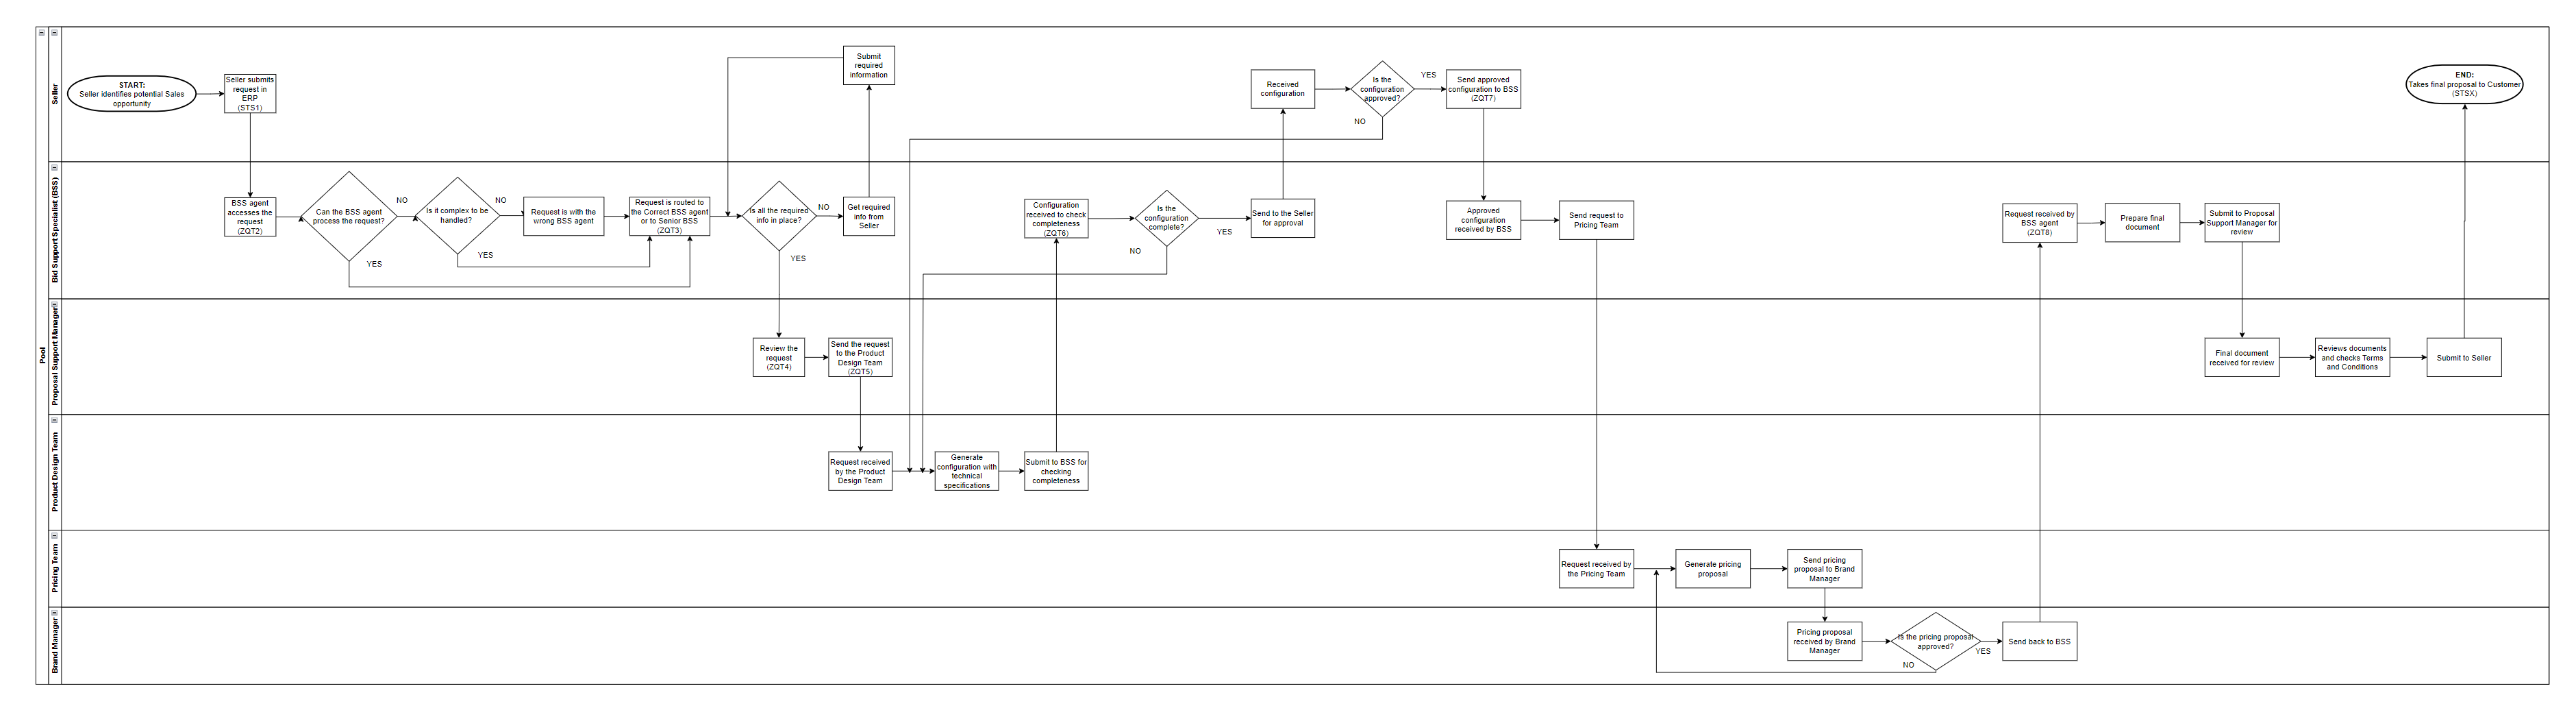

>**The relationship between timestamps and roles:**<br>
>- Seller: STS1, ZQT7, STSX
>- BSS: ZQT2, ZQT3, ZQT6, ZQT8
>- Proposal Support Manager: ZQT4, ZQT5

## For Seller:

In [259]:
df.groupby(['Seller'])['STS1'].mean().nlargest(25)

Seller
Omar        2.02
Martha      2.02
Jose        2.01
Amy         2.01
Carlos      2.01
Pablo       1.93
Henry       1.91
Pierre      1.91
Alina       1.90
Ozil        1.90
Matsuyama   1.88
Yui         1.88
Sakura      1.87
Aiko        1.87
Sam         1.86
Hali        1.86
William     1.86
Alison      1.86
Tamara      1.85
Yoko        1.85
Devin       1.82
Thomas      1.81
Roger       1.80
Caitlin     1.79
Wendy       1.78
Name: STS1, dtype: float64

In [260]:
df.groupby(['Seller'])['ZQT3'].mean().nlargest(25)

Seller
William     9.00
Devin       8.01
Sam         8.00
Ozil        6.01
Jose        5.02
Aiko        1.81
Alison      1.81
Amy         1.81
Henry       1.81
Hali        1.80
Martha      1.80
Caitlin     1.80
Pablo       1.80
Omar        1.80
Tamara      1.80
Wendy       1.80
Pierre      1.80
Matsuyama   1.80
Thomas      1.80
Carlos      1.80
Alina       1.79
Yui         1.79
Roger       1.79
Sakura      1.78
Yoko        1.77
Name: ZQT3, dtype: float64

In [261]:
df.groupby(['Seller'])['Total_Transaction_Time'].mean().nlargest(25)

Seller
William     50.74
Sam         47.80
Devin       46.87
Jose        43.68
Ozil        41.99
Pablo       28.43
Pierre      28.36
Henry       28.33
Alina       28.28
Amy         28.19
Omar        28.16
Martha      28.16
Carlos      28.09
Hali        27.26
Alison      27.23
Tamara      27.16
Matsuyama   27.09
Sakura      27.06
Yui         27.05
Aiko        27.02
Yoko        26.91
Thomas      26.33
Roger       26.32
Caitlin     26.31
Wendy       26.23
Name: Total_Transaction_Time, dtype: float64

In [262]:
df.groupby(['Seller'])['ZQT7'].mean().nlargest(25)

Seller
Devin       9.97
William     9.01
Sam         8.00
Jose        5.99
Ozil        5.02
Matsuyama   1.83
Aiko        1.82
Hali        1.82
Yui         1.81
Pierre      1.81
Martha      1.81
Amy         1.81
Alison      1.80
Alina       1.80
Carlos      1.80
Henry       1.80
Sakura      1.80
Omar        1.80
Caitlin     1.79
Thomas      1.79
Tamara      1.79
Yoko        1.79
Roger       1.79
Pablo       1.79
Wendy       1.78
Name: ZQT7, dtype: float64

In [263]:
df.groupby(['Seller'])['STSX'].mean().nlargest(25)

Seller
Amy         2.12
Jose        2.10
Ozil        2.10
Martha      2.10
Pierre      2.10
Omar        2.09
Henry       2.09
Carlos      2.09
Pablo       2.08
Alina       2.06
Yoko        2.00
Matsuyama   2.00
Yui         1.99
Sakura      1.98
Aiko        1.98
Sam         1.93
Hali        1.93
Alison      1.92
William     1.91
Tamara      1.91
Caitlin     1.90
Roger       1.90
Thomas      1.89
Wendy       1.89
Devin       1.89
Name: STSX, dtype: float64

## For BSS:

In [264]:
df.groupby(['BSS'])['ZQT2'].mean().nlargest(25)

BSS
38   5.09
58   5.04
14   4.09
65   4.08
10   4.05
17   4.05
29   3.98
32   3.20
4    3.15
1    3.14
62   2.43
82   2.43
30   2.42
44   2.42
42   2.41
64   2.41
2    2.40
52   2.39
81   2.39
47   1.85
74   1.84
16   1.84
90   1.84
73   1.84
63   1.83
Name: ZQT2, dtype: float64

In [265]:
df.groupby(['BSS'])['ZQT3'].mean().nlargest(25)

BSS
74   4.59
76   4.58
67   4.58
62   4.57
61   4.57
77   4.56
68   4.54
66   4.54
64   4.53
69   4.53
65   4.52
75   4.52
71   4.50
63   4.50
70   4.49
73   4.48
78   4.48
79   4.47
72   4.42
80   4.41
93   3.16
97   3.15
84   3.14
87   3.13
94   3.13
Name: ZQT3, dtype: float64

In [280]:
df.groupby(['BSS'])['ZQT6'].mean().nsmallest(25)

BSS
50    4.95
76    4.96
48    4.98
44    4.98
54    4.98
47    4.98
9     5.00
100   5.01
88    5.03
62    5.05
10    5.97
87    5.97
72    5.97
51    5.97
97    5.97
3     5.98
8     5.98
53    5.98
22    5.98
93    5.99
45    5.99
80    6.00
81    6.00
78    6.00
39    6.01
Name: ZQT6, dtype: float64

In [267]:
df.groupby(['BSS'])['ZQT8'].mean().nlargest(25)

BSS
4     12.04
58     9.10
17     9.03
49     8.11
82     8.07
66     8.05
37     8.03
87     8.03
67     8.03
45     8.02
40     8.02
32     8.02
72     8.02
35     8.02
3      8.01
100    8.01
22     8.00
63     8.00
75     8.00
65     7.99
69     7.99
41     7.98
26     7.98
21     7.97
56     7.97
Name: ZQT8, dtype: float64

## For Proposal Support Manager:

In [268]:
psm = ['ZQT4', 'ZQT5']
my_summary_stats(df, psm)

mean  median  std_dev  min_val  max_val  outlier_issue
ZQT4  3.57    1.79     3.56     1.00    19.31          False
ZQT5  1.98    1.23     1.36     1.00    11.81          False

In [ ]:
ppp = ['ZQT6', 'ZQT8']
